In [24]:
import os, sys
cwd = os.getcwd()
sys.path.append(cwd+'/../')

import numpy as np
from scipy import misc
import tensorflow as tf
import matplotlib.pyplot as plt


from tf_unet import unet, util, image_util


In [2]:
data_provider = image_util.ImageDataProvider("./data/pascalDB/*", n_class=21, data_suffix=".jpg",mask_suffix="_mask.png")
cwd = os.getcwd()
output_path = cwd + '/output/tutorial1/'

Number of files used: 2913


In [42]:
data, label = data_provider._next_data()
ny = data.shape[0]
nx = data.shape[1]
labels = data_provider._process_labels(label)
data = data_provider._process_data(data)

for ii in range(21):
                print(label[label==ii+1])
                index = np.where(label==ii+1)
                temp = np.zeros((ny,nx))
                temp[index[0], index[1]] = 1
                if index[0].size:
                    labels[...,ii] = misc.imresize(temp, (300, 300)).astype(bool)


[1. 1. 1. ... 1. 1. 1.]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


/usr/lib/python3/dist-packages/scipy/misc/pilutil.py:479: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/lib/python3/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


(300, 300, 21)
Tensor("Reshape_14:0", shape=(90000, 21), dtype=float32)


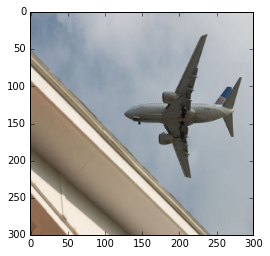

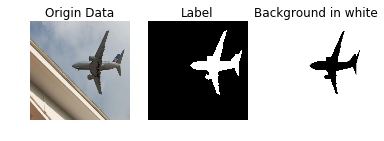

In [43]:
print(labels.shape)


plt.imshow(data)

f, axarr = plt.subplots(1,3)
axarr[0].imshow(data)
axarr[0].set_title("Origin Data")
axarr[0].axis('off')

# axarr[1].imshow(labels[...,1]*10+labels[...,14]*20)
axarr[1].imshow(labels[...,0], cmap='gray')
axarr[1].set_title("Label")
axarr[1].axis('off')

axarr[2].imshow(labels[...,20], cmap='gray')
axarr[2].set_title("Background in white")
axarr[2].axis('off')

plt.savefig('example.png')

mmm = tf.reshape(labels,[-1,21])
print(mmm)


In [4]:
# data, label = data_provider._next_data()
# labels = data_provider._process_labels(label)
# print(labels)
# print(label.shape[1], label.shape[0])
# print(data_provider.n_class)
# for ii in range(1,20):
#     print(label[label==ii])
#     if len(label[label==ii]):
#         aa=ii
        
# nx = label.shape[1]
# ny = label.shape[0]
# print(nx,ny)
# labels = np.zeros((ny, nx, data_provider.n_class), dtype=np.float32)
# # labels = data_provider._process_labels(label)
# print(labels.shape)

# for ii in range(data_provider.n_class):
#                 print(str(ii))
#                 index = np.where(label==ii+1)
#                 print(index)
#                 if index[0].size:
#                  labels[index[0], index[1],ii] = 1
# index = np.where(np.logical_or(label==0,label==255))
# labels[index[0], index[1],20] = 1
                
# print(labels.shape) 
# print(labels[...,aa-1])
# print(np.where(labels[...,aa-1]==1))
# print(labels[...,20])
# # print(aa, labels[...,ii])

/usr/lib/python3/dist-packages/scipy/misc/pilutil.py:479: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/lib/python3/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [138]:
# data, label = data_provider._next_data()
# print(label.shape[1], label.shape[0])
# print(data_provider.n_class)
# for ii in range(1,20):
#     print(label[label==ii])
#     if len(label[label==ii]):
#         aa=ii
# labels = data_provider._process_labels(label)
# print(labels.shape)
# print(labels[200,...])

In [139]:


# variables = %who_ls
# for v in variables:
#     print(v, type(eval(v)).__name__, str(eval(v)))


In [88]:
from scipy import misc 

aaa=np.zeros((10,10))
aaa[1:6,4]=3
print(aaa)
ccc=np.resize(aaa,(5,5))
print(ccc)
ddd = misc.imresize(aaa,(5,5), 'cubic')
print(ddd)
print(misc.imresize(aaa,(5,5), 'cubic').astype(bool))

# ccc=1*(~aaa.astype(bool))
# print(ccc)
# print(data_provider(34))


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3.]]
[[  0  16  59   0   0]
 [  0  30 116   0   0]
 [  0  27 104   0   0]
 [  0   2   7   0   0]
 [  0   0   0   0   0]]
[[False  True  True False False]
 [False  True  True False False]
 [False  True  True False False]
 [False  True  True False False]
 [False False False False False]]


/usr/lib/python3/dist-packages/scipy/misc/pilutil.py:479: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/lib/python3/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [77]:
#setup & training
# input: 3 channels (RGB), features_root:#layer in the first layer, layers: # of layers
net = unet.Unet(layers=4, features_root=64, channels=3, n_class=21)
trainer = unet.Trainer(net)
path = trainer.train(data_provider, output_path, training_iters=32, epochs=100)


2018-07-18 01:50:59,490 Layers 4, features 64, filter size 3x3, pool size: 2x2
2018-07-18 01:51:01,186 Removing '/home/ohyeonpc/Desktop/Ohyeon5Projects/MismatchPenaltySegmentation/unet/tf_unet/5hyeon/prediction'
2018-07-18 01:51:01,187 Removing '/home/ohyeonpc/Desktop/Ohyeon5Projects/MismatchPenaltySegmentation/unet/tf_unet/5hyeon/output/tutorial1'
2018-07-18 01:51:01,188 Allocating '/home/ohyeonpc/Desktop/Ohyeon5Projects/MismatchPenaltySegmentation/unet/tf_unet/5hyeon/prediction'
2018-07-18 01:51:01,189 Allocating '/home/ohyeonpc/Desktop/Ohyeon5Projects/MismatchPenaltySegmentation/unet/tf_unet/5hyeon/output/tutorial1'


TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [20]:
index = np.where(labels)
print(index[0])
# misc.imshow(labels[...,20])
# misc.imshow(data)

mmm = tf.reshape(labels,[-1,21])
print(mmm)


[  0   0   0 ... 299 299 299]
Tensor("Reshape_1:0", shape=(90000, 21), dtype=float32)
